In [1]:
import sys, numpy as np, scipy as sp, matplotlib.pyplot as plt, matplotlib
import scipy.signal
%pylab inline

sys.path.append('../engine')
sys.path.append('..')

from engine import digital

# Forçar o uso de LaTeX
from matplotlib import rc
##rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

N = 5
Wn = 8e-3
Rp = 1
Rs = 80   

sample_rate = 5
nyquist = sample_rate/2
Wn_normalized = np.array(Wn)/nyquist


Populating the interactive namespace from numpy and matplotlib


In [2]:
butter = scipy.signal.iirfilter(N, Wn_normalized, Rp, Rs, btype='lowpass', analog=False, ftype='butter')
cheby1 = scipy.signal.iirfilter(N, Wn_normalized, Rp, Rs, btype='lowpass', analog=False, ftype='cheby1')
cheby2 = scipy.signal.iirfilter(N, Wn_normalized, Rp, Rs, btype='lowpass', analog=False, ftype='cheby2')
elliptic = scipy.signal.iirfilter(N, Wn_normalized, Rp, Rs, btype='lowpass', analog=False, ftype='elliptic')
bessel = scipy.signal.iirfilter(N, Wn_normalized, Rp, Rs, btype='lowpass', analog=False, ftype='bessel')



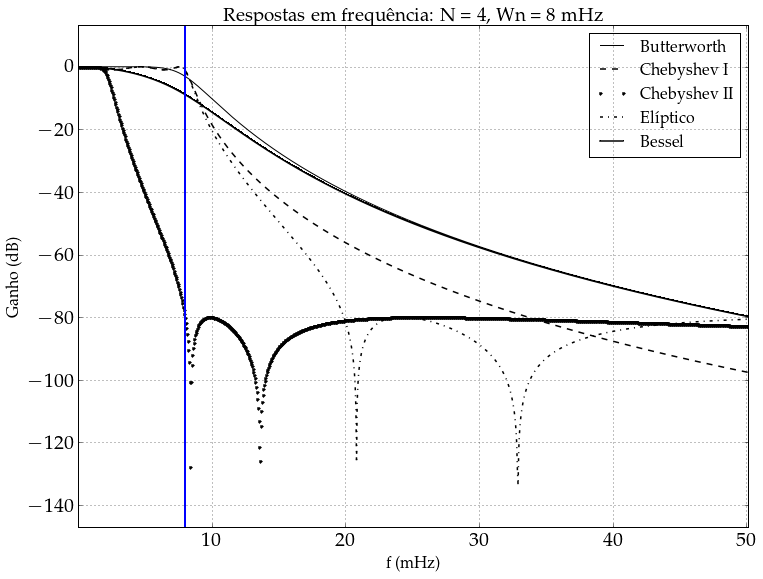

In [12]:
fig = plt.figure(1, figsize=(12, 9))
dashes = ['k-', 'k--', 'k.', 'k-.', 'k-,']


for (pos, filter_type) in enumerate([butter, cheby1, cheby2, elliptic, bessel]):
    w, h = scipy.signal.freqz(filter_type[0], filter_type[1], worN=linspace(0.00005, 0.063, 1000))
    freqs = sample_rate * w / (2*np.pi)
    plt.plot(freqs * 1000, 20 * np.log10(abs(h)), dashes[pos], linewidth=(1 if pos == 0 else 1.5)) # Conversao Hz -> mHz
    #plt.axis([57, 63, min(20 * np.log10(abs(h)))*3, 1])
    #plt.axis([0, 14, -140, 3])

    
#ax1 = plt.gca()
#ax1.set_xticks(range(0, 25))
plt.grid()
plt.margins(0, 0.1)
plt.legend(["Butterworth", "Chebyshev I", "Chebyshev II", "El\\'iptico", "Bessel"], loc='best', fontsize=16)
plt.xlabel("f (mHz)", fontsize=16)
plt.ylabel("Ganho (dB)", fontsize=16)
plt.axvline(8, color='blue', linewidth=2)
#plt.axvline(61, color='blue', linewidth=2)
plt.title("Respostas em frequ\^encia: N = 4, Wn = 8 mHz", fontsize=19)
plt.savefig("lowpass_IIR.eps")

In [109]:
(180/2*pi)/nyquist

0.5654866776461628

In [105]:
1/(2*pi)

0.15915494309189535